In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Data Understanding


In [2]:
titan = pd.read_csv('D:\\Datasets\\titanic.csv')
titan.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titan.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
titan.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


# Check for Dtypes

In [7]:
dtypes = titan.dtypes
numUniq = titan.nunique()
pd.DataFrame({'Data Type': dtypes, 'Num_Of_Uniques': numUniq}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Data Type,int64,int64,object,float64,int64,int64,float64,object,object
Num_Of_Uniques,2,3,2,88,7,7,248,147,3


In [8]:
cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
titan[cols] = titan[cols].astype('category')
dtypes = titan.dtypes
numUniq = titan.nunique()
pd.DataFrame({'Dtypes': dtypes, 'NumOfUniques': numUniq}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtypes,category,category,category,float64,category,category,float64,object,category
NumOfUniques,2,3,2,88,7,7,248,147,3


# Handle Missing Values


In [9]:
nulls = titan.isnull().sum()
ratio  = 100*nulls/titan.shape[0]
pd.DataFrame({'nullSum': nulls, 'ratio': ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
nullSum,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
ratio,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [10]:
titan.dropna(subset=['Embarked'], inplace=True)
nulls = titan.isnull().sum()
ratio  = 100*nulls/titan.shape[0]
pd.DataFrame({'Null Sum': nulls, 'Ratio': ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null Sum,0.0,0.0,0.0,177.000000,0.0,0.0,0.0,687.00000,0.0
Ratio,0.0,0.0,0.0,19.910011,0.0,0.0,0.0,77.27784,0.0


In [11]:
titan.drop('Cabin',axis=1,  inplace=True)
nulls = titan.isnull().sum()
ratio  = 100*nulls/titan.shape[0]
pd.DataFrame({'Null Sum': nulls, 'Ratio': ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Null Sum,0.0,0.0,0.0,177.000000,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,19.910011,0.0,0.0,0.0,0.0


In [12]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    category
 1   Pclass    889 non-null    category
 2   Sex       889 non-null    category
 3   Age       712 non-null    float64 
 4   SibSp     889 non-null    category
 5   Parch     889 non-null    category
 6   Fare      889 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(6), float64(2)
memory usage: 27.2 KB


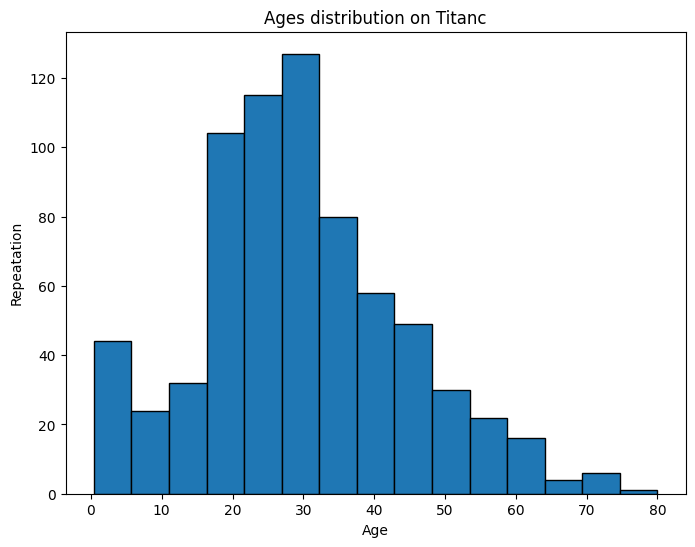

In [13]:
plt.figure(figsize=(8,6))
plt.hist(titan['Age'].dropna(), edgecolor = 'k' , bins=15)
plt.title('Ages distribution on Titanc')
plt.xlabel('Age')
plt.ylabel('Repeatation')
plt.show()

In [14]:
ageMedian = titan.Age.median()
titan['Age'].fillna(ageMedian, inplace=True)
nulls = titan.isnull().sum()
ratio  = 100*nulls/titan.shape[0]
pd.DataFrame({'nullSum': nulls, 'ratio': ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
nullSum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


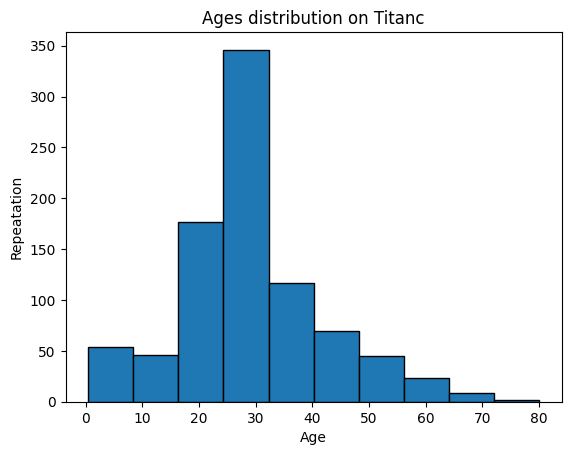

In [15]:
plt.figure()
plt.hist(titan['Age'], edgecolor = 'k')
plt.title('Ages distribution on Titanc')
plt.xlabel('Age')
plt.ylabel('Repeatation')
plt.show()

# Handle Outliers

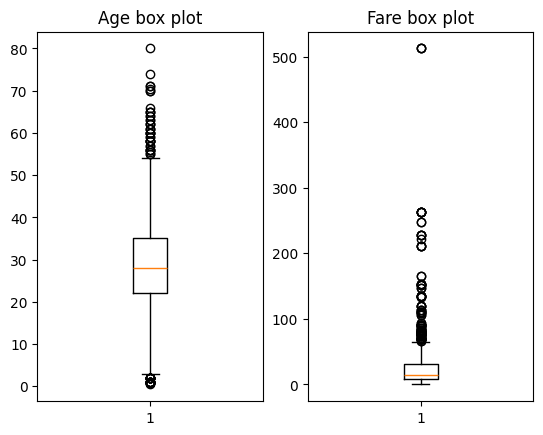

In [16]:
numCol = titan.select_dtypes('number').columns
numCol
plt.figure()
for i, col in enumerate(numCol):
    plt.subplot(1, 2, i+1)
    plt.boxplot(titan[col])
    plt.title(f"{col} box plot")
plt.show()


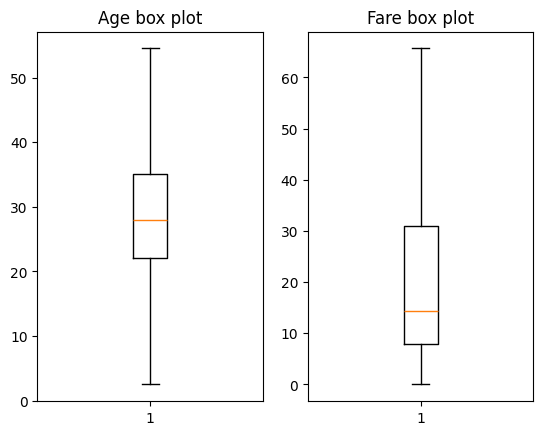

In [17]:
for col in numCol:
    Q1 = titan[col].quantile(0.25)
    Q3 = titan[col].quantile(0.75)
    IQR = Q3 - Q1
    UP_FENNCE = Q3 + 1.5 * IQR
    LO_FENNCE = Q1 - 1.5 * IQR
    lowOutlier = titan[titan[col] < LO_FENNCE][col].values
    upOutlier = titan[titan[col] > UP_FENNCE][col].values
    titan[col].replace(lowOutlier, LO_FENNCE, inplace=True)
    titan[col].replace(upOutlier, UP_FENNCE, inplace=True)

plt.figure()
for i, col in enumerate(numCol):
    plt.subplot(1, 2, i+1)
    plt.boxplot(titan[col])
    plt.title(f"{col} box plot")
plt.show()

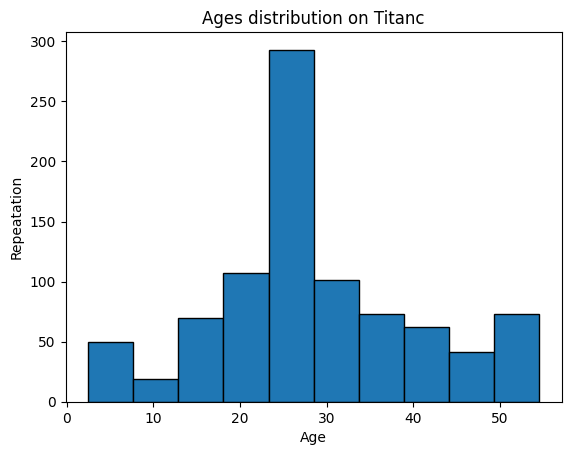

In [18]:
plt.figure()
plt.hist(titan['Age'], edgecolor = 'k')
plt.title('Ages distribution on Titanc')
plt.xlabel('Age')
plt.ylabel('Repeatation')
plt.show()

# Visualizations
* A. Data Distribution Graphs
>> Numerical Data Distribution

1. Histogram

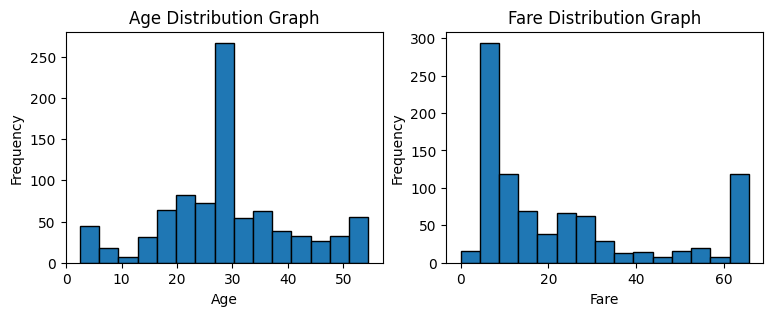

In [19]:
numCol = titan.select_dtypes('number').columns
plt.figure(figsize=(9, 3))
for i, col in enumerate(numCol):
    plt.subplot(1, 2, i+1)
    plt.hist(titan[col], edgecolor= 'k', bins=15)
    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')
    plt.title(f"{col} Distribution Graph")
plt.show()


2. KDE Plot

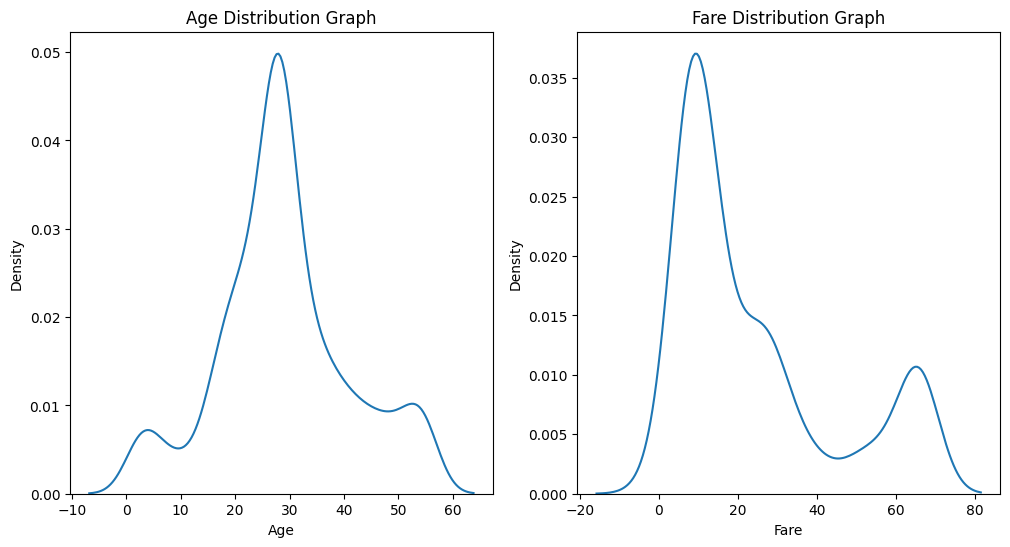

In [20]:
numCol = titan.select_dtypes('number').columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(numCol):
    plt.subplot(1, 2, i+1)
    sns.kdeplot(titan[col])
    plt.xlabel(f"{col}")
    plt.ylabel('Density')
    plt.title(f"{col} Distribution Graph")
plt.show()


>> Categorical Data Distribution
3. Count Plot

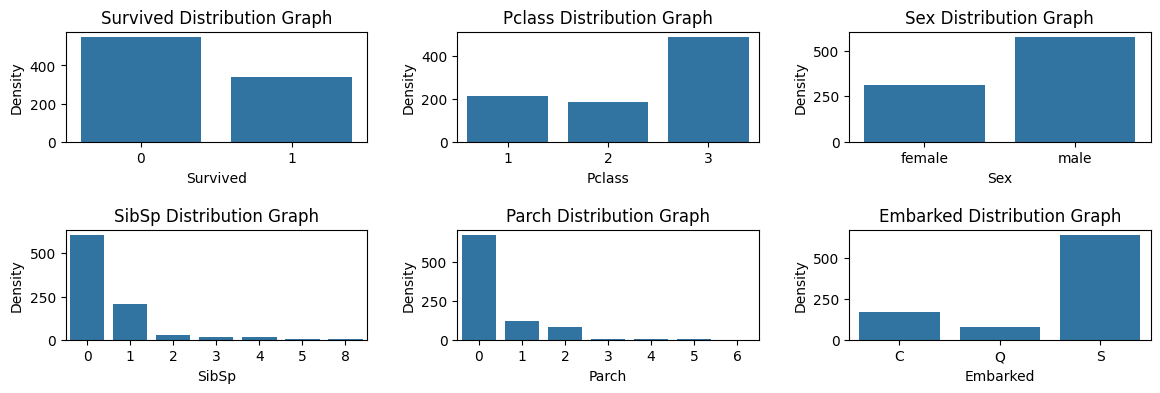

In [21]:
strCol = titan.select_dtypes('category').columns
plt.figure(figsize=(14, 4))
for i, col in enumerate(strCol):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=titan)
    plt.xlabel(f"{col}")
    plt.ylabel('Density')
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

4. Pie Plot

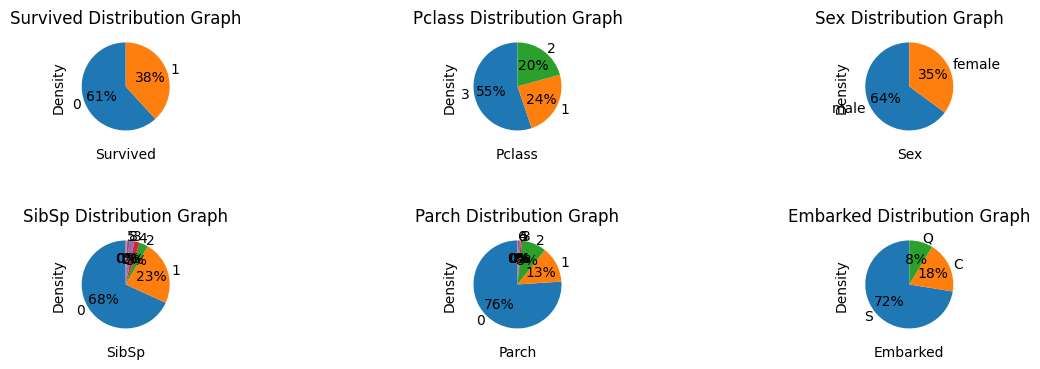

In [22]:
numCol = titan.select_dtypes('category').columns
plt.figure(figsize=(14, 4))
for i, col in enumerate(numCol):
    plt.subplot(2, 3, i+1)
    unique = titan[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count, labels=categories, autopct="%1.1d%%", startangle=90)
    plt.xlabel(f"{col}")
    plt.ylabel('Density')
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

* B. Outlier Detection Graphs

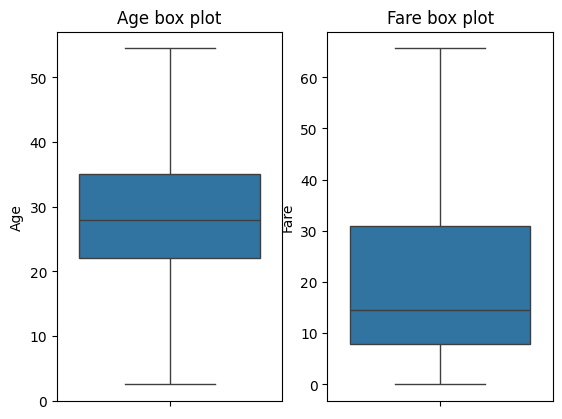

In [23]:
numCol = titan.select_dtypes('number').columns
plt.figure()
for i, col in enumerate(numCol):
    plt.subplot(1, 2, i+1)
    sns.boxplot(titan[col], orient='v')
    plt.title(f"{col} box plot")
plt.show()


* C. Relationship Graphs:
>> Num/Num
1. Scatter Plot

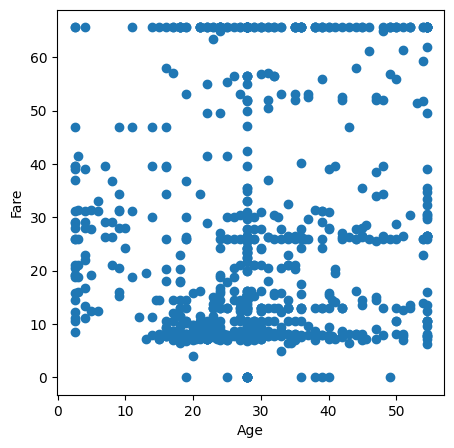

In [24]:
plt.figure(figsize=(5, 5))
plt.scatter(titan['Age'], titan['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

2. Pair Plot

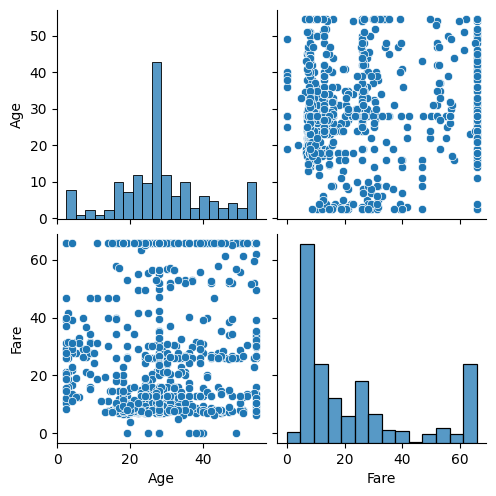

In [25]:
sns.pairplot(titan)

3. Line Plot

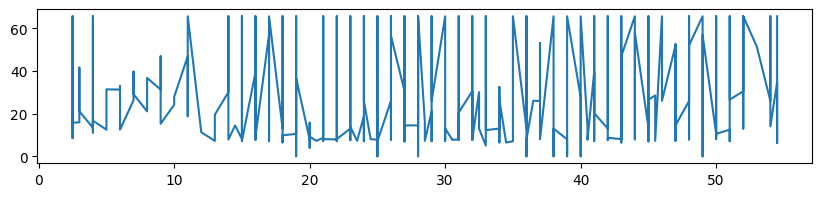

In [26]:
sortedTitan = titan.sort_values(by='Age')
plt.figure(figsize=(10, 2))
plt.plot(sortedTitan['Age'], sortedTitan['Fare'])
plt.show()

4. Heat Map

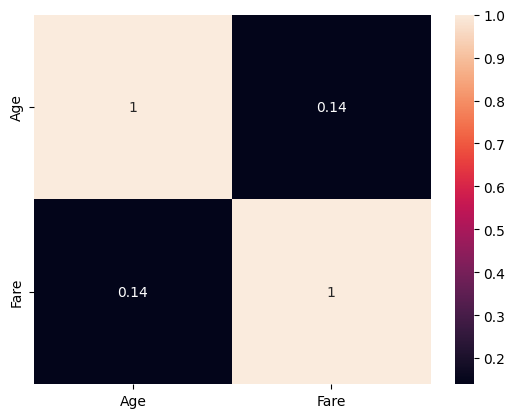

In [27]:
corr = titan[['Age', 'Fare']].corr()
plt.figure()
sns.heatmap(corr, annot=True)
plt.show()

>> Num/Cat
1. Bar Plot


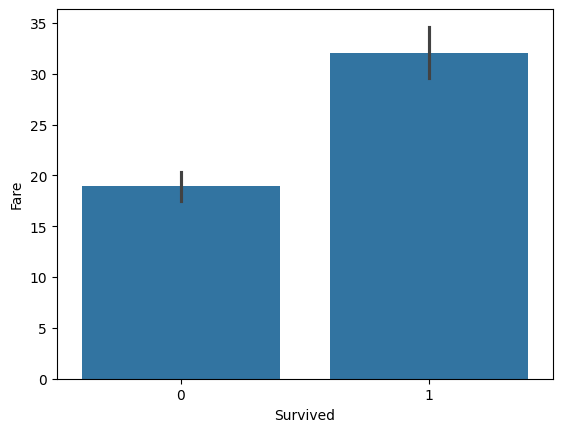

In [28]:
plt.figure()
sns.barplot(x='Survived', y='Fare', data=titan)
plt.show()

>> Cat/Cat

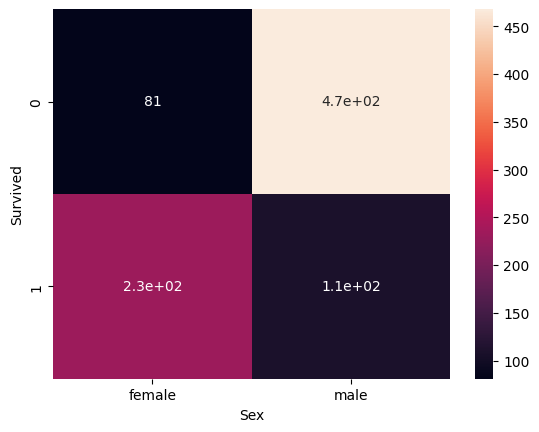

In [29]:
plt.figure()
agg = titan.pivot_table(index='Survived', columns='Sex', values='Age', aggfunc=len)
sns.heatmap(agg, annot=True)
plt.show()

# Removing Duplicates

In [30]:
titan.duplicated().sum()

129

In [31]:
titan.drop_duplicates(inplace=True)
titan.duplicated().sum()

0

In [32]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  760 non-null    category
 1   Pclass    760 non-null    category
 2   Sex       760 non-null    category
 3   Age       760 non-null    float64 
 4   SibSp     760 non-null    category
 5   Parch     760 non-null    category
 6   Fare      760 non-null    float64 
 7   Embarked  760 non-null    category
dtypes: category(6), float64(2)
memory usage: 23.5 KB


# Splitting Data

# Normalization

In [33]:
from sklearn.preprocessing import MinMaxScaler
numCol = titan.select_dtypes('number').columns
scaler = MinMaxScaler()
scaler.fit(titan[numCol])
titan[numCol] = scaler.transform(titan[numCol])

titan.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,0.375000,1,0,0.110424,S
1,1,1,female,0.682692,1,0,1.000000,C
2,1,3,female,0.451923,0,0,0.120704,S
3,1,1,female,0.625000,1,0,0.808757,S
4,0,3,male,0.625000,0,0,0.122608,S
5,0,3,male,0.490385,0,0,0.128827,Q
6,0,1,male,0.990385,0,0,0.789909,S
7,0,3,male,0.000000,3,1,0.320990,S
8,1,3,female,0.471154,0,2,0.169569,S
9,1,2,female,0.221154,1,0,0.458003,C


In [34]:
titan['Embarked'].unique()
titan['Embarked'].replace(titan['Embarked'].unique(), [1, 2, 3], inplace=True)
titan.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,0.375000,1,0,0.110424,1
1,1,1,female,0.682692,1,0,1.000000,2
2,1,3,female,0.451923,0,0,0.120704,1
3,1,1,female,0.625000,1,0,0.808757,1
4,0,3,male,0.625000,0,0,0.122608,1


In [35]:
titan.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,0.375000,1,0,0.110424,1
1,1,1,female,0.682692,1,0,1.000000,2
2,1,3,female,0.451923,0,0,0.120704,1
3,1,1,female,0.625000,1,0,0.808757,1
4,0,3,male,0.625000,0,0,0.122608,1
5,0,3,male,0.490385,0,0,0.128827,3
6,0,1,male,0.990385,0,0,0.789909,1
7,0,3,male,0.000000,3,1,0.320990,1
8,1,3,female,0.471154,0,2,0.169569,1
9,1,2,female,0.221154,1,0,0.458003,2


# Encoding

In [36]:
from category_encoders import OneHotEncoder
strCol = ['Sex', 'Embarked']
encoder = OneHotEncoder(cols = strCol, drop_invariant= True)
titan = encoder.fit_transform(titan)

titan.head(10)

,Survived,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,Embarked_3
0,0,3,1,0,0.375000,1,0,0.110424,1,0,0
1,1,1,0,1,0.682692,1,0,1.000000,0,1,0
2,1,3,0,1,0.451923,0,0,0.120704,1,0,0
3,1,1,0,1,0.625000,1,0,0.808757,1,0,0
4,0,3,1,0,0.625000,0,0,0.122608,1,0,0
5,0,3,1,0,0.490385,0,0,0.128827,0,0,1
6,0,1,1,0,0.990385,0,0,0.789909,1,0,0
7,0,3,1,0,0.000000,3,1,0.320990,1,0,0
8,1,3,0,1,0.471154,0,2,0.169569,1,0,0
9,1,2,0,1,0.221154,1,0,0.458003,0,1,0


In [37]:
titan.info()


<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    760 non-null    category
 1   Pclass      760 non-null    category
 2   Sex_1       760 non-null    int64   
 3   Sex_2       760 non-null    int64   
 4   Age         760 non-null    float64 
 5   SibSp       760 non-null    category
 6   Parch       760 non-null    category
 7   Fare        760 non-null    float64 
 8   Embarked_1  760 non-null    int64   
 9   Embarked_2  760 non-null    int64   
 10  Embarked_3  760 non-null    int64   
dtypes: category(4), float64(2), int64(5)
memory usage: 51.4 KB


# >>Regression

# Raw Implementations (Linear Regression)

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , confusion_matrix
from sklearn.metrics import accuracy_score, classification_report


# Hypothesis Function
# h0(x) - X0
def hypothesis(features, parameters):
    return np.dot(features, parameters)



# Cost Function
def cost_function(features, target, parameters):
    n = len(target)
    error = hypothesis(features, parameters) - target     # error = y - y_predict
    return (1/n)* np.dot(error.T, error)                  # 1/n * (error)^2



# Gradient Descent
def gradient_descent(features, target, parameters, alpha, iterations):
    n = len(target)
    costHistory = []
    for i in range(iterations):
        predict = hypothesis(features, parameters)
        errors = np.dot(features.T, (predict - target))
        parameters -= (2*alpha) * errors
        costHistory.append(cost_function(features, target, parameters))
    return parameters, costHistory



#Data Calling and Assume Survived as a Target Vector (Vertical Splitting)
df = titan.astype('float')
x = df.drop('Survived', axis=1).values
y = df['Survived'].values


# Splitting the data into Train and Test (Horizontal Splitting)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)


# Add column stacking to simulate the parameters
X_train = np.hstack([np.ones((X_train.shape[0], 1)) , X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)) , X_test])


#Initial Parameters 
parameters = np.zeros(X_train.shape[1])


# Model Training
alpha = 0.0001
iterations = 4000
parameters, costHistory = gradient_descent(X_train, y_train, parameters, alpha, iterations)


# Model Testing
y_predict = np.round(hypothesis(X_test, parameters))


# Accuracy Matrix Evaluation
realVSpredict = pd.DataFrame({'Real': y_test, 'Predict' : y_predict})



# Evaluating the model
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)


print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
realVSpredict.corr()


Mean Squared Error: 0.17763157894736842
Mean Absolute Error: 0.17763157894736842
R² Score: 0.2421052631578947


,Real,Predict
Real,1.000000,0.622439
Predict,0.622439,1.000000


# Sklearn Implementations (Linear Regression)

In [39]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,confusion_matrix


# Selecting features and target
X = titan.drop(['Survived'], axis=1)  
y = titan['Survived']


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Making predictions
y_pred = model.predict(X_test)
realVsPredict = pd.DataFrame({'real': y_test, 'predicted': np.round(y_pred)})
realVsPredict.corr()


# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
realVsPredict.corr()


Mean Squared Error: 0.13073538944117435
Mean Absolute Error: 0.29447879286538453
R² Score: 0.44219567171765606


,real,predicted
real,1.000000,0.622439
predicted,0.622439,1.000000


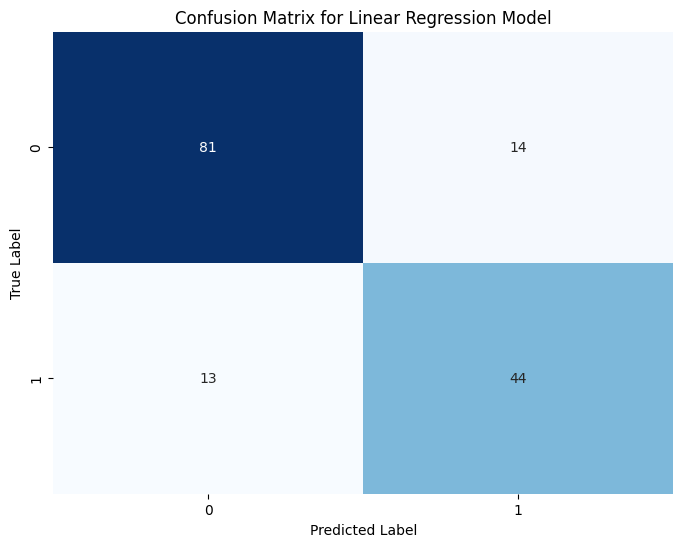

In [40]:
LR_CM = confusion_matrix(y_test.values, np.round(y_pred))
# Function to plot confusion matrix as heatmap
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
plot_confusion_matrix(LR_CM, "Linear Regression Model")

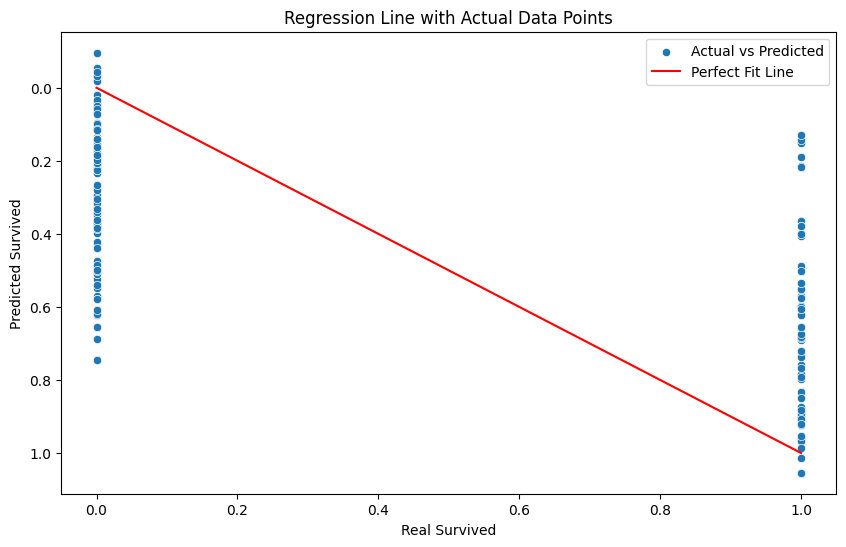

In [41]:
# Plotting the regression line with actual data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, label='Actual vs Predicted')
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Fit Line')
plt.xlabel('Real Survived')
plt.ylabel('Predicted Survived')
plt.title('Regression Line with Actual Data Points')
plt.legend()
plt.show()

# Raw Implementations (Polynomial Regression)

In [42]:
def polynomialFeaturesRaw(x, degree):
    n = x.shape[0]
    featuresMatrix = [np.ones(n)]
    for d in range(1, degree + 1):
        for i in range(x.shape[1]):
            featuresMatrix.append(x[:, i]**d)
    return np.column_stack(featuresMatrix)


X = titan.drop(['Survived'] , axis=1).values
y = titan['Survived']


x_poly = polynomialFeaturesRaw(X, degree = 2)

X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=20)
Xtx = np.dot(X_train.T, X_train)
Xty = np.dot(X_train.T, y_train)
beta = np.linalg.solve(Xtx, Xty)
beta


def predict(X, beta):
    return np.dot(X, beta)

y_pred = predict(X_test, beta)

mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)


print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
realVSpredict.corr()

Mean Squared Error: 0.17763157894736842
Mean Absolute Error: 0.17763157894736842
R² Score: 0.2421052631578947


,Real,Predict
Real,1.000000,0.622439
Predict,0.622439,1.000000


# Sklearn Implementations (Polynomial Regression)

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,confusion_matrix

# Selecting features and target
X = titan.drop(['Survived'], axis=1)  
y = titan['Survived']

# Creating polynomial features 
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X)



# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=20)



# Creating and training the Polynomial Regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Making predictions
y_pred = model.predict(X_test)
Real_VS_Predict = pd.DataFrame({'real': y_test, 'predicted': np.round(y_pred)})

# Evaluation Metrics
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

# Result
print("Mean Squared Error:", MSE)
print("Mean Absolute Error:", MAE)
print("R² Score:", R2)
Real_VS_Predict.corr()

Mean Squared Error: 0.1556372062329617
Mean Absolute Error: 0.2933730332142988
R² Score: 0.3359479200726967


,real,predicted
real,1.000000,0.644828
predicted,0.644828,1.000000


# Sklearn Implementations (Logistic Regression)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , mean_absolute_error , mean_squared_error , r2_score , ConfusionMatrixDisplay

# Example data
X = titan.drop(['Survived'] , axis=1)
y = titan['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)


# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
R2 = r2_score(y_test, y_pred)
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=L.classes_)
disp.plot()
plt.title(' Logistic Confusion Matrix')
plt.show()

Results = pd.DataFrame({'Accuracy in %':accuracy*100 , 'Mean Squared Error':MSE , 'Mean Absolute Error':MAE , 'R² Score':R2} , index=['Result'])
Results

,Accuracy in %,Mean Squared Error,Mean Absolute Error,R² Score
Result,80.921053,0.155637,0.293373,0.335948


# >>Classification

# Sklearn implmentation of KNN

Accuracy in % = 78.28947368421053
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        80
           1       0.90      0.61      0.73        72

    accuracy                           0.78       152
   macro avg       0.81      0.77      0.77       152
weighted avg       0.81      0.78      0.78       152



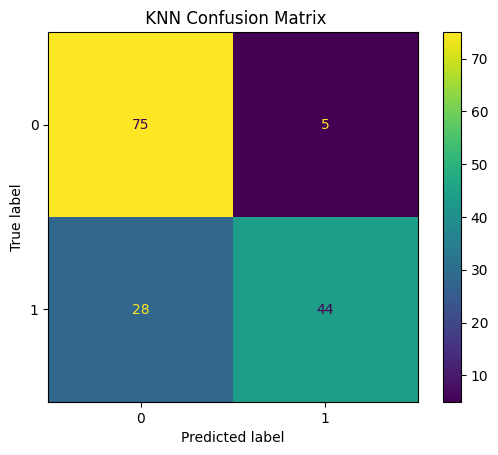

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , ConfusionMatrixDisplay


X = titan.drop('Survived', axis=1)  
y = titan['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# Initialize the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Predict the labels for the test set
knn_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, knn_pred)
print(f'Accuracy in % = {accuracy * 100}')

# Display classification report
print(classification_report(y_test, knn_pred))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, knn_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot()
plt.title(' KNN Confusion Matrix')
plt.show()



# Sklearn implmentation of SVM

Accuracy in % = 76.97368421052632
              precision    recall  f1-score   support

           0       0.72      0.91      0.81        80
           1       0.86      0.61      0.72        72

    accuracy                           0.77       152
   macro avg       0.79      0.76      0.76       152
weighted avg       0.79      0.77      0.76       152



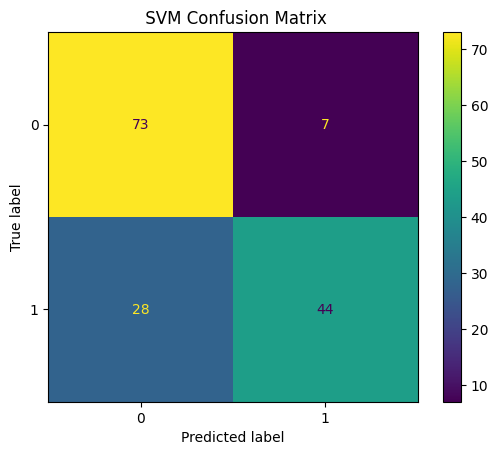

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,  ConfusionMatrixDisplay



X = titan.drop('Survived', axis=1)  
y = titan['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create an SVM classifier (using the RBF kernel) for all 6 features
svm_classifier = SVC(kernel='rbf', C=1000, gamma=0.1)

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
svm_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, svm_pred)
print(f'Accuracy in % = {accuracy * 100}')

# Display classification report
print(classification_report(y_test, svm_pred))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test,svm_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=svm_classifier.classes_)
disp.plot()
plt.title(' SVM Confusion Matrix')
plt.show()

# Sklearn implmentation of Decision tree

Accuracy in % = 73.02631578947368
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        80
           1       0.74      0.67      0.70        72

    accuracy                           0.73       152
   macro avg       0.73      0.73      0.73       152
weighted avg       0.73      0.73      0.73       152



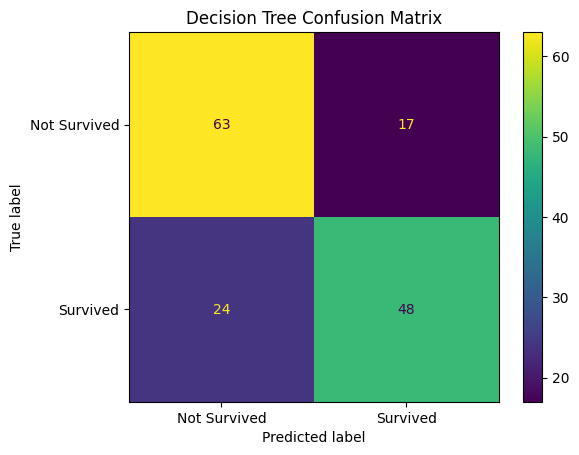

In [55]:
from sklearn.tree import DecisionTreeClassifier

X = titan.drop('Survived', axis=1)  
y = titan['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a Decision Tree classifier (you can adjust hyperparameters)
model = DecisionTreeClassifier() # DecisionTreeClassifier(criterion='entropy')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
Dt_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, Dt_pred)
print(f'Accuracy in % = {accuracy * 100}')

# Display classification report
print(classification_report(y_test, Dt_pred))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, Dt_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=['Not Survived', 'Survived'])
disp.plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()




# Sklearn implmentation of Bagging classifier

Accuracy in % = 80.26315789473685
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        80
           1       0.86      0.69      0.77        72

    accuracy                           0.80       152
   macro avg       0.81      0.80      0.80       152
weighted avg       0.81      0.80      0.80       152



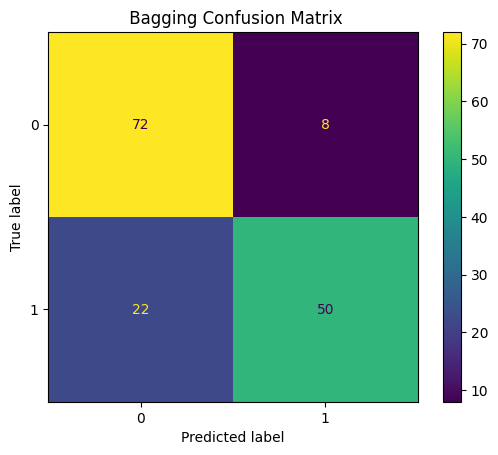

In [54]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


X = titan.drop('Survived', axis=1)  
y = titan['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=42)


baggingModel = BaggingClassifier(base_estimator=DecisionTreeClassifier() , n_estimators=100 , random_state=42)
baggingModel.fit(X_train , y_train)
bagging_predict = baggingModel.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, bagging_predict)
print(f'Accuracy in % = {accuracy * 100}')

# Display classification report
print(classification_report(y_test, bagging_predict))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, bagging_predict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix , display_labels=baggingModel.classes_)
disp.plot()
plt.title(' Bagging Confusion Matrix')
plt.show()




# Sklearn implmentation of Boosting classifier

Accuracy in % = 75.0
              precision    recall  f1-score   support

           0       0.73      0.82      0.78        80
           1       0.77      0.67      0.72        72

    accuracy                           0.75       152
   macro avg       0.75      0.75      0.75       152
weighted avg       0.75      0.75      0.75       152



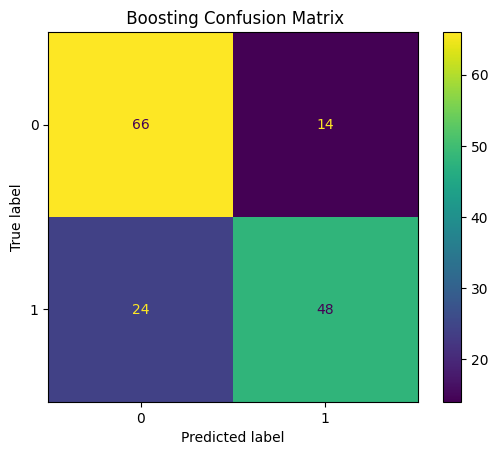

In [58]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score , classification_report , ConfusionMatrixDisplay , confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Splitting data
X = titan.drop('Survived', axis=1)  
y = titan['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=42)


boostingModel = AdaBoostClassifier(base_estimator=DecisionTreeClassifier() , n_estimators=100 , random_state=42)
boostingModel.fit(X_train , y_train)
boosting_predict = boostingModel.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, boosting_predict)
print(f'Accuracy in % = {accuracy * 100}')

# Display classification report
print(classification_report(y_test, boosting_predict))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, boosting_predict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix , display_labels=boostingModel.classes_)
disp.plot()
plt.title(' Boosting Confusion Matrix')
plt.show()




# Sklearn implmentation of Random Forest classifier

Accuracy in % = 80.26315789473685
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        80
           1       0.83      0.74      0.78        72

    accuracy                           0.80       152
   macro avg       0.81      0.80      0.80       152
weighted avg       0.80      0.80      0.80       152



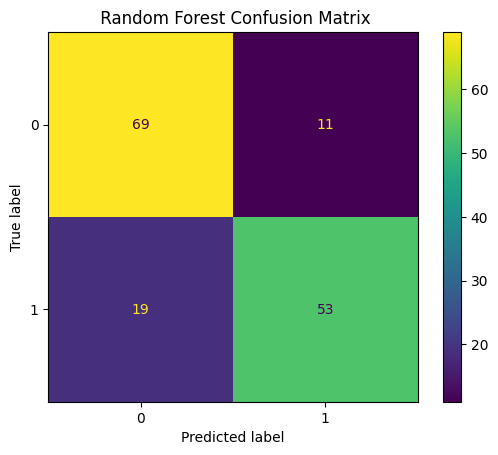

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

# Splitting data
X = titan.drop('Survived', axis=1)  
y = titan['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=42)


R_model = RandomForestClassifier(n_estimators=100 , random_state=42)
R_model.fit(X_train , y_train )

R_predict = R_model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, R_predict)
print(f'Accuracy in % = {accuracy * 100}')

# Display classification report
print(classification_report(y_test, R_predict))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, R_predict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix , display_labels=R_model.classes_)
disp.plot()
plt.title(' Random Forest Confusion Matrix')
plt.show()
